# Prediction of drug target interaction for drug discovery 

### Introduction

In this notebook : data exploration + feature engineering 


### Imports

In [1]:
# Linear algebra and data handling
import numpy as np
import pandas as pd

# RDKit
import rdkit 
from rdkit import Chem
from rdkit.Chem import AllChem, Draw


#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading and preprocessing

First, we need to load the dataset.

In [2]:
# Loading the train and test csv files
train = pd.read_csv('../data/X_train.csv')
test = pd.read_csv('../data/X_test.csv')

y_train = pd.read_csv('../data/y_train.csv')['y']

# You can check the shapes of the train and test sets

print(f"The train set contains {train.shape[0]} molecules.")
print(f"The test set contains {test.shape[0]} molecules.")

# You can check what it looks like
train.head()

The train set contains 4400 molecules.
The test set contains 2934 molecules.


,id,smiles
0,0,CNC(=O)c1ccccc1Sc1ccc2c(C#Cc3cccc(NCCOC)c3)n[n...
1,1,CC(C)(C)c1ccc(Nc2nnc(-c3cnccc3CCc3ccncc3)o2)cc1
2,2,CN1CCN(CCCn2ccc(-c3cnc4c(-c5ccsc5)cnn4c3)cc2=O...
3,3,CCn1c2ccc(NC(=O)Nc3ccc(OC)cc3)cc2c2c3c(c4c(c21...
4,4,Cc1ccc(C(=O)Nc2cccc(C(C)C)c2)cc1N1CCc2ncncc2C1


As you can see, molecules are encoded using the SMILES notation. To be understandable by the rdkit package, we need to convert them to "Mol" type.

In [3]:
# Convert SMILES to mols
train['mol'] = train['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 
test['mol'] = test['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

print(type(train['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


Visualization of molecules

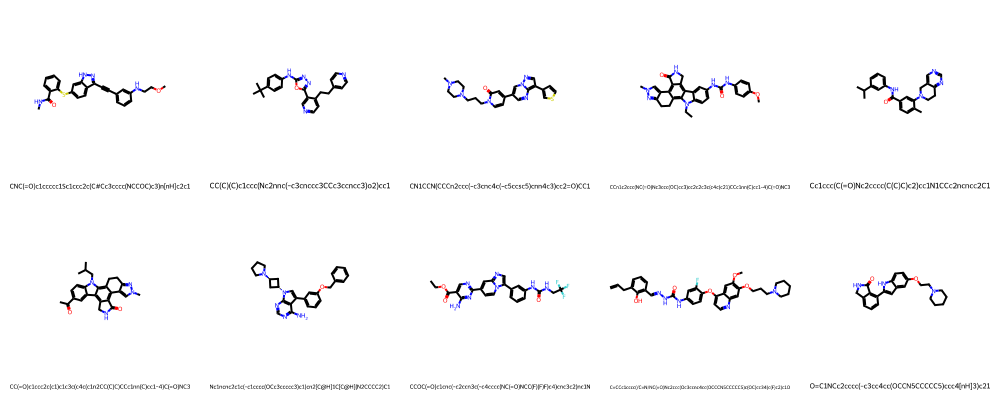

In [5]:
mols = train['mol'][:10]

#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(train['smiles'][:10].values))

After converting SMILES to Mol, we can compute fingerprints. For this example, we use the Morgan fingerprints, a popular type of circular fingerprints, but many others exist. 

In [4]:
# Convert Mol to fingerprints

train['fps_1'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)) for mol in train['mol']]
test['fps_1'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)) for mol in test['mol']]


print(f"The train test contains {train['fps_1'].shape[0]} molecules encoded with {train['fps_1'][0].shape[0]} bits.")
print(f"The test test contains {test['fps_1'].shape[0]} molecules encoded with {test['fps_1'][0].shape[0]} bits.")

The train test contains 4400 molecules encoded with 2048 bits.
The test test contains 2934 molecules encoded with 2048 bits.


Add caracteristics, such as the number of atoms ....

In [5]:
train['mol'] = train['mol'].apply(lambda x: Chem.AddHs(x)) # AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
train['num_of_atoms'] = train['mol'].apply(lambda x: x.GetNumAtoms())
train['num_of_heavy_atoms'] = train['mol'].apply(lambda x: x.GetNumHeavyAtoms())

test['mol'] = test['mol'].apply(lambda x: Chem.AddHs(x)) # AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
test['num_of_atoms'] = test['mol'].apply(lambda x: x.GetNumAtoms())
test['num_of_heavy_atoms'] = test['mol'].apply(lambda x: x.GetNumHeavyAtoms())

#add y to train dataset
train['y']=y_train

In [8]:
train.head()

,id,smiles,mol,fps_1,num_of_atoms,num_of_heavy_atoms,y
0,0,CNC(=O)c1ccccc1Sc1ccc2c(C#Cc3cccc(NCCOC)c3)n[n...,<rdkit.Chem.rdchem.Mol object at 0x7fc73afb4ed0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",57,33,7.882729
1,1,CC(C)(C)c1ccc(Nc2nnc(-c3cnccc3CCc3ccncc3)o2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fc73afb4f30>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",55,30,6.508498
2,2,CN1CCN(CCCn2ccc(-c3cnc4c(-c5ccsc5)cnn4c3)cc2=O...,<rdkit.Chem.rdchem.Mol object at 0x7fc73afb4f90>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",57,31,8.148742
3,3,CCn1c2ccc(NC(=O)Nc3ccc(OC)cc3)cc2c2c3c(c4c(c21...,<rdkit.Chem.rdchem.Mol object at 0x7fc73aef6e10>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67,39,7.954677
4,4,Cc1ccc(C(=O)Nc2cccc(C(C)C)c2)cc1N1CCc2ncncc2C1,<rdkit.Chem.rdchem.Mol object at 0x7fc73aef6bd0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",55,29,7.954677


How the number of atoms are link with the level of pIC50 (y) ?

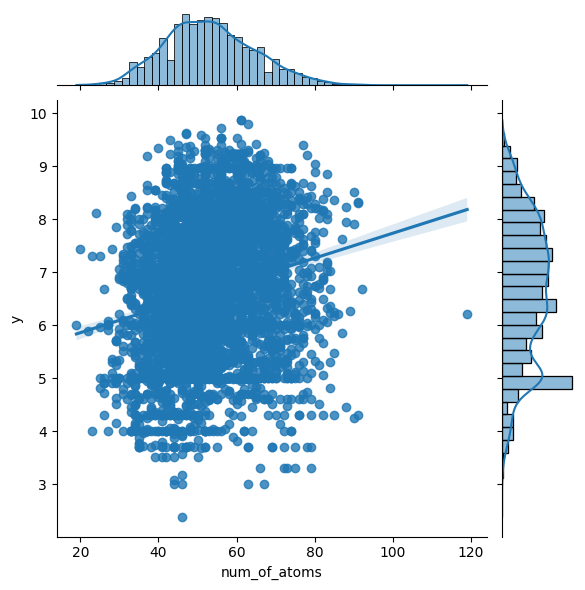

In [9]:
import seaborn as sns
sns.jointplot(data=train, x='num_of_atoms', y='y', kind="reg")
plt.show()

Pic en y=5

<Axes: >

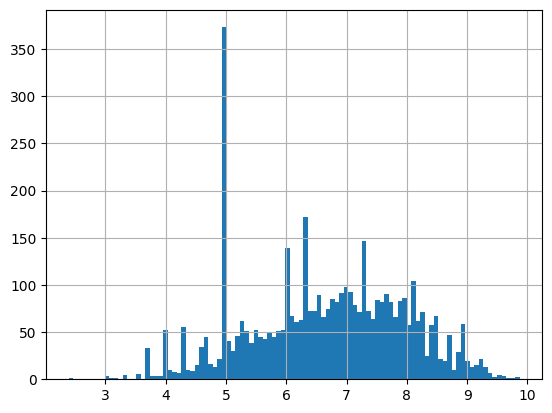

In [10]:
y_train.hist(bins=100)

<Axes: >

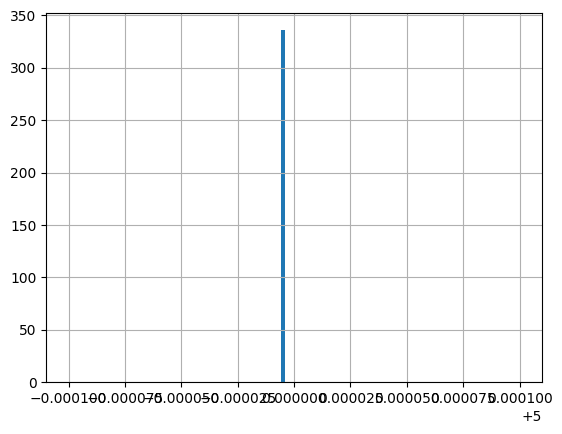

In [11]:
y_train.hist(bins=100, range=(4.9999,5.0001))

In [12]:
np.sum((y_train>4.8)&(y_train<5.01))

407

No clear dependence -> we need more features 

You can uncomment this code to reload all the descriptors of all molecules 

In [ ]:
from rdkit.Chem import Descriptors, AllChem

#descriptor of molecules 
#descrs_train = [Descriptors.CalcMolDescriptors(mol) for mol in train['mol']]
#descrs_train= pd.DataFrame(descrs_train)
#descrs_test = [Descriptors.CalcMolDescriptors(mol) for mol in test['mol']]
#descrs_test= pd.DataFrame(descrs_test)

#download into csv
#descrs_train.to_csv('descriptors_train.csv', index=False)
#descrs_test.to_csv('descriptors_test.csv', index=False)

Here we load all descriptors in dataframes

In [14]:
descrs_train = pd.read_csv('/Users/claire/Desktop/ENSAE/3A/projet_advanced_ML/aml_project/claire/descriptors_train.csv')
descrs_test = pd.read_csv('/Users/claire/Desktop/ENSAE/3A/projet_advanced_ML/aml_project/claire/descriptors_test.csv')

In [7]:
#add descriptors to ours previous dataframes
train = pd.concat([train, descrs_train], axis=1)
test = pd.concat([test, descrs_test], axis=1)

Add features about the most frequents atoms

In [8]:
from collections import Counter

# find n most frequent atoms in df 
def find_top_atoms(df, n):
    all_atoms = Counter()

    for mol in df['mol']:
        for atom in mol.GetAtoms():
            symbol = atom.GetSymbol()
            all_atoms[symbol] += 1
    all_atoms['H']= all_atoms['Si']=0
    
    top_atoms = [atom for atom, count in all_atoms.most_common(n)]
    return top_atoms


top_8_atoms = find_top_atoms(train, n=8)

print("8 most frequent atoms :", top_8_atoms)

8 most frequent atoms : ['C', 'N', 'O', 'F', 'Cl', 'S', 'Br', 'I']


In [9]:
# GetSubstructMatches() : subpattern search method

def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(top_8_atoms, train)
number_of_atoms(top_8_atoms, test)

How the number of each atoms in molecules are link with the level of pIC50 (y) ? (last row)

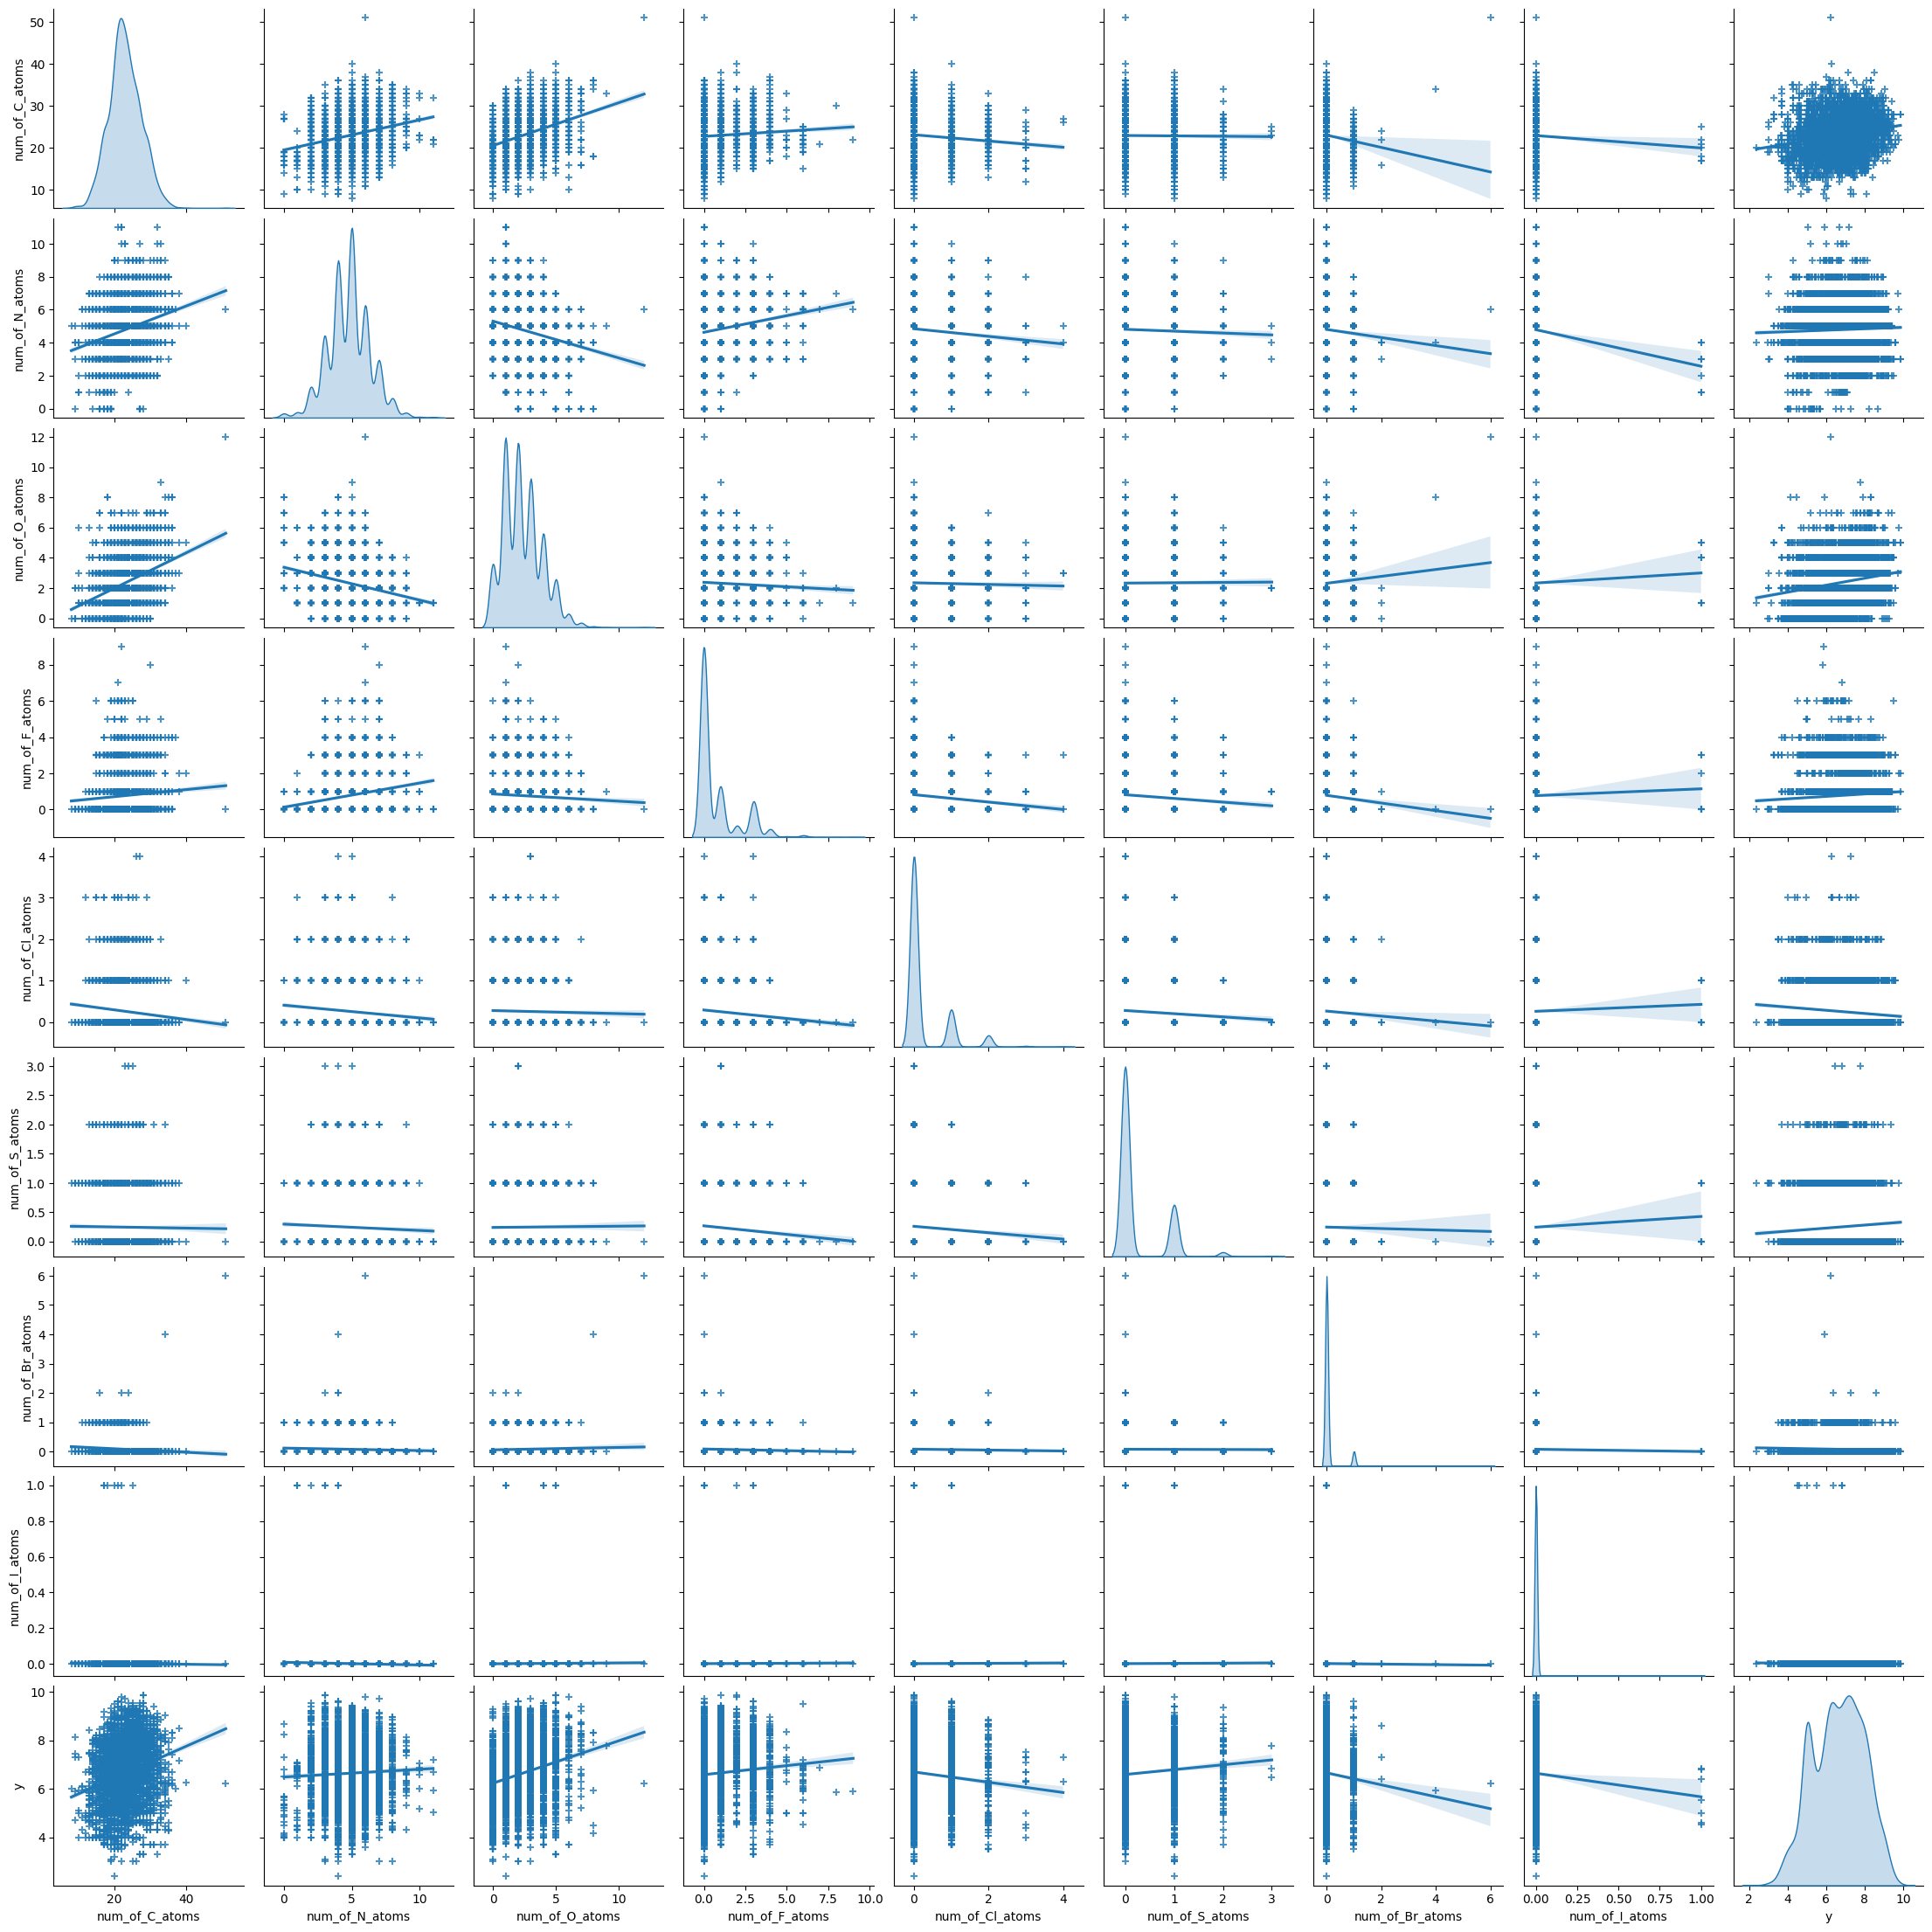

In [31]:
sns.pairplot(train[['num_of_C_atoms','num_of_N_atoms', 'num_of_O_atoms','num_of_F_atoms', 'num_of_Cl_atoms', 'num_of_S_atoms', 'num_of_Br_atoms', 'num_of_I_atoms', 'y']], diag_kind='kde', kind='reg', markers='+')
plt.show()

Add features based on the fingerprints 

In [10]:
# Feature engineering
def calculate_additional_features(df,fps):
    df['num_bits_active']= fps.apply(lambda x: np.sum(x))
    df['mean_bit_density'] = fps.apply(lambda x: np.mean(x))
    
    return df

# Calculate additional features for training and test data and add them to dataframes
train = calculate_additional_features(train,train['fps_1'])
test = calculate_additional_features(test,test['fps_1'])

Remoove columns with Na

In [11]:
na_col_train = train.columns[train.isna().any()].tolist()
na_col_test = test.columns[test.isna().any()].tolist()
print(na_col_train==na_col_test)

X_train = train.drop(columns=['id','smiles','mol','y']+na_col_train)
X_test = test.drop(columns=['id','smiles','mol']+na_col_test)

True


Transforme the column 'fps_1' (vectors of 2048 bits) into 2048 new columns

In [13]:
# column fps_1 in 2048 new columns
X_train_expanded = pd.DataFrame(X_train['fps_1'].tolist(), columns=[f'feature_{i}' for i in range(1, 2049)])
X_train = pd.concat([X_train, X_train_expanded], axis=1)
X_train = X_train.drop(columns=['fps_1'])

X_test_expanded = pd.DataFrame(X_test['fps_1'].tolist(), columns=[f'feature_{i}' for i in range(1, 2049)])
X_test = pd.concat([X_test, X_test_expanded], axis=1)
X_test = X_test.drop(columns=['fps_1'])

Download finals datasets as csv 

In [14]:
X_train.to_csv('final_train.csv', index=False)
X_test.to_csv('final_test.csv', index=False)